In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['Genre'].head()

In [ ]:
df.duplicated().sum()

In [ ]:
df.describe()

Exploration summary

 We have a dataframe conisisting of 9827 rows and 8 columns.
 Our dataset looks a bit tidy with no Nans nor duplicated values.
 Release_date column needs to be casted into data time and to extract only year value.
 Vote_count and vote_value both needed to be casted into correct data type.
 Overview, original_value and poster_url wouldn't be useful while analysis, so we will drop them.
 There is no noticable ouliers in popularity column.
 Genre column has comma seperated values and white spaces taht needs to be handled and casted into catgories

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Release_Date'] = df['Release_Date'].dt.year


df['Release_Date'].dtypes

In [ ]:
df.head()

Dropping the columns

In [ ]:
cols = ['Overview', 'Original_Language', 'Poster_Url\r']

In [ ]:
df.drop(cols, axis = 1, inplace = True, errors='ignore')
df.columns

In [ ]:
df.head()

In [ ]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

In [ ]:

df.dropna(inplace = True)

df.isna().sum()

In [ ]:
df.head()

we'd spllit genres into a list and then explode our dataframe to have only one genre per row for each movie

In [ ]:
df['Genre'] = df['Genre'].fillna('')

df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()


In [ ]:
df.info()

Data visualization

In [ ]:
sns.set_style('whitegrid')

What is most frequent genre of movies released on netflix?

In [48]:
df['Genre'].describe()

count      9826
unique     2337
top       Drama
freq        466
Name: Genre, dtype: object

which has the highest votes in vote avg column

In [50]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


 what movie got the highest popularity? what's its genre?

In [57]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"


 what movie got the lowestt popularity? what's its genre?


In [59]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
1115,NaN,61.328,7.1,en,NaN,NaN


Which year has the most filmmed movies?

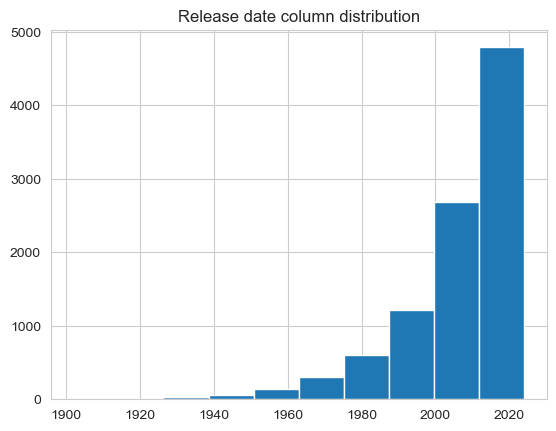

In [63]:
df['Release_Date'].hist()
plt.title('Release date column distribution')
plt.show()

# Conclusion

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of th times among other genres.

We have 25.5% of our dataset with our popular vote. Drama again gets th highest popularity among fans by being having more than 18.5% of movies popularities.

Spider-man: No way home has the highest popularity rate in our datset and it has genre of Action, Adventure and Science fiction.

Year 2020 has the highest filming rate in our dataset.